# This notebook combines the functionalities of two separate methods for synthetic data generation: CTGAN and Faker. We will process a single input dataset to generate two separate outputs, one using CTGAN and another using Faker.


In [ ]:
!pip install ctgan
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_

## Import Libraries

Here we import all necessary libraries for data handling and synthetic data generation using both CTGAN and Faker.


In [ ]:
from ctgan import CTGAN
import pandas as pd
from faker import Faker
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Load Dataset

Load the dataset which will be used as the base for generating synthetic data by both the CTGAN and Faker models.


In [ ]:
data = pd.read_csv('dataset.csv')

## CTGAN Synthetic Data Generation

Setup and train the CTGAN model on the input data, then generate and save the synthetic data.


In [ ]:
discrete_columns = ['text', 'Pattern Category']
ctgan = CTGAN(epochs=100)
ctgan.fit(data, discrete_columns)
ctgan_synthetic_data = ctgan.sample(2000)
ctgan_synthetic_data.to_csv('ctgan_output.csv', index=False)

In [ ]:
faker = Faker()
def generate_text_by_category(category):
    if category == 'Urgency':
        return faker.sentence(ext_word_list=['Hurry', 'Limited', 'Offer', 'Now', 'Exclusive'])
    else:
        return faker.sentence()

def create_synthetic_data(num_entries=2000):
    data = {
        'page_id': np.arange(1, num_entries + 1),
        'text': [],
        'label': np.random.randint(0, 2, num_entries),
        'Pattern Category': np.random.choice(['Urgency', 'Not Dark Pattern'], num_entries, p=[0.2, 0.8])
    }
    for category in data['Pattern Category']:
        data['text'].append(generate_text_by_category(category))
    return pd.DataFrame(data)

In [ ]:
faker_synthetic_data = create_synthetic_data()
faker_synthetic_data.to_csv('faker_output.csv', index=False)

## Conclusion for synthetic data

The generated CSV files `ctgan_output.csv` and `faker_output.csv` contain synthetic data created by the CTGAN and Faker models respectively. These files can be used for further analysis or model training without the risk of exposing real data.


# Model Training with Synthetic Data Integration

This notebook has been updated to include the training of models using synthetic data generated by CTGAN and Faker, alongside the original data, to enhance the training process and possibly improve model robustness.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize


## Load Datasets

Here, we load the original dataset along with the synthetic data generated by both CTGAN and Faker. These datasets are then combined to form a comprehensive training set.


In [ ]:
original_data = pd.read_csv('./dataset.csv')

ctgan_data = pd.read_csv('./ctgan_output.csv')

faker_data = pd.read_csv('./faker_output.csv')


## Setup Machine Learning Pipelines

Configure the machine learning pipelines used for training on each dataset.


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
svd = TruncatedSVD(n_components=100, random_state=42)

def setup_pipeline():
    rf_pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('svd', svd),
        ('clf', RandomForestClassifier(random_state=42))
    ])
    svm_pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('svd', svd),
        ('clf', SVC(random_state=42))
    ])
    return rf_pipeline, svm_pipeline

rf_params = {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]}
svm_params = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}




## Train and Evaluate Models

Train and evaluate RandomForest and SVM models separately on each dataset.



CTGAN on Original - RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.02      0.04      1178
           1       0.49      0.95      0.65      1178

    accuracy                           0.49      2356
   macro avg       0.40      0.49      0.35      2356
weighted avg       0.40      0.49      0.35      2356



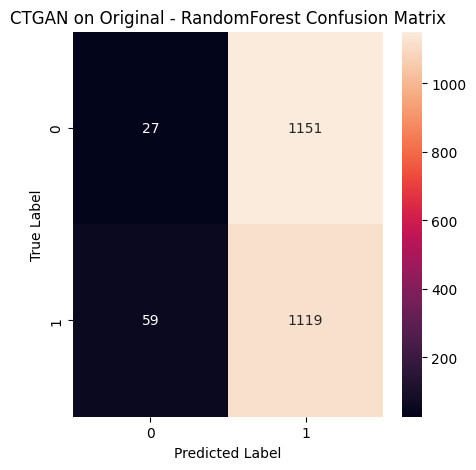


CTGAN on Original - SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1178
           1       0.50      1.00      0.67      1178

    accuracy                           0.50      2356
   macro avg       0.25      0.50      0.33      2356
weighted avg       0.25      0.50      0.33      2356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


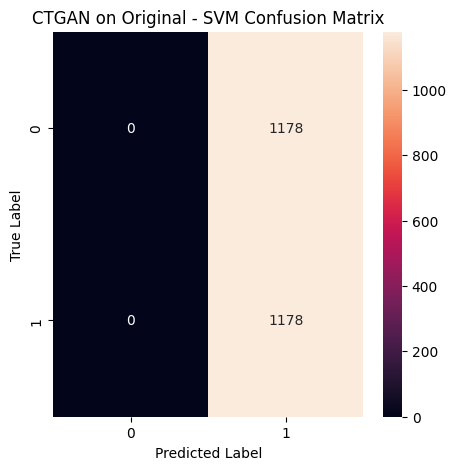


Faker on Original - RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59      1178
           1       0.57      0.48      0.52      1178

    accuracy                           0.56      2356
   macro avg       0.56      0.56      0.55      2356
weighted avg       0.56      0.56      0.55      2356



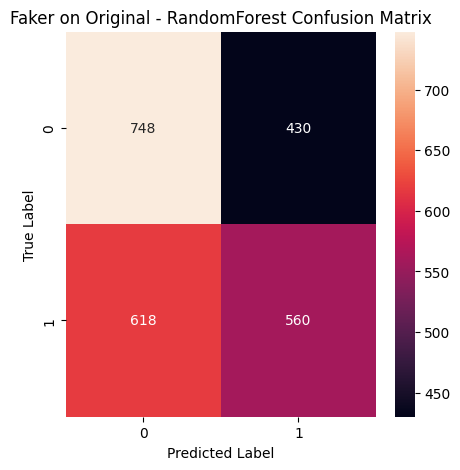


Faker on Original - SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1178
           1       0.50      1.00      0.67      1178

    accuracy                           0.50      2356
   macro avg       0.25      0.50      0.33      2356
weighted avg       0.25      0.50      0.33      2356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


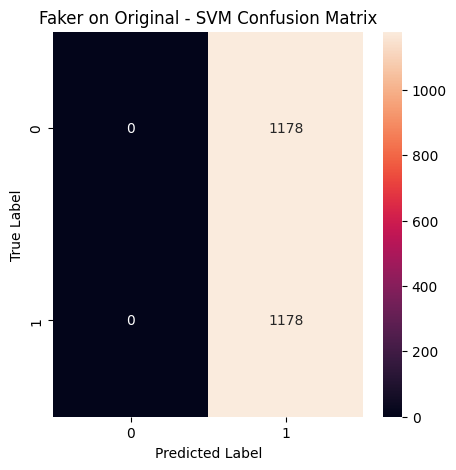

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

def train_on_synthetic_test_on_real(train_data, test_data, dataset_name):
    X_train = train_data['text']
    y_train = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    rf_pipeline, svm_pipeline = setup_pipeline()

    rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy')
    rf_grid.fit(X_train, y_train)
    rf_predictions = rf_grid.best_estimator_.predict(X_test)

    svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy')
    svm_grid.fit(X_train, y_train)
    svm_predictions = svm_grid.best_estimator_.predict(X_test)

    results[dataset_name] = {
        'RandomForest': {
            'Predictions': rf_predictions,
            'True Labels': y_test,
            'Best Model': rf_grid.best_estimator_
        },
        'SVM': {
            'Predictions': svm_predictions,
            'True Labels': y_test,
            'Best Model': svm_grid.best_estimator_
        }
    }

def evaluate_results():
    for dataset_name, models in results.items():
        for model_name, model_results in models.items():
            predictions = model_results['Predictions']
            true_labels = model_results['True Labels']
            print(f"\n{dataset_name} - {model_name} Classification Report:")
            print(classification_report(true_labels, predictions))

            cm = confusion_matrix(true_labels, predictions)
            plt.figure(figsize=(5, 5))
            sns.heatmap(cm, annot=True, fmt="d")
            plt.title(f'{dataset_name} - {model_name} Confusion Matrix')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()

train_on_synthetic_test_on_real(ctgan_data, original_data, "CTGAN on Original")
train_on_synthetic_test_on_real(faker_data, original_data, "Faker on Original")
evaluate_results()
